# CLICK THROUGH RATE PREDICTION

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#importing sklearn libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score,auc,balanced_accuracy_score,confusion_matrix,f1_score,log_loss,mean_squared_error,precision_score,r2_score,recall_score,roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import RandomizedSearchCV


#statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf


#importing warnings
import warnings
warnings.filterwarnings("ignore")

# Analysing and understanding the data

In [3]:
#reading the dataframe
data = pd.read_csv("data.csv")
data.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [5]:
data.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
mean,1004.967550,0.289943,1.01639,0.329453,18857.231732,318.834548,60.278743,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,1.091916,0.505707,0.53110,0.854673,4944.919482,21.510752,47.713436,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.00000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


In [6]:
data.shape

(99999, 27)

### There are no missing value in the dataset as seen above

In [202]:
data['click'].value_counts()/len(data)

False    0.830198
True     0.169802
Name: click, dtype: float64

### The percentage for data points that are "False" is 83% and that of "True" is 17%.

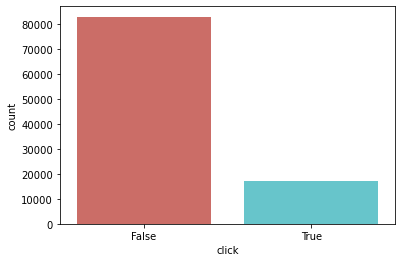

In [7]:
#visualizing the data
sns.countplot(x='click',data=data, palette='hls')
plt.show();

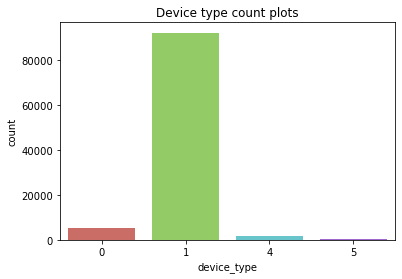

In [8]:
sns.countplot(x='device_type',data=data, palette='hls')
plt.title('Device type count plots')
plt.show();

### Plotting no. of clicks per hour

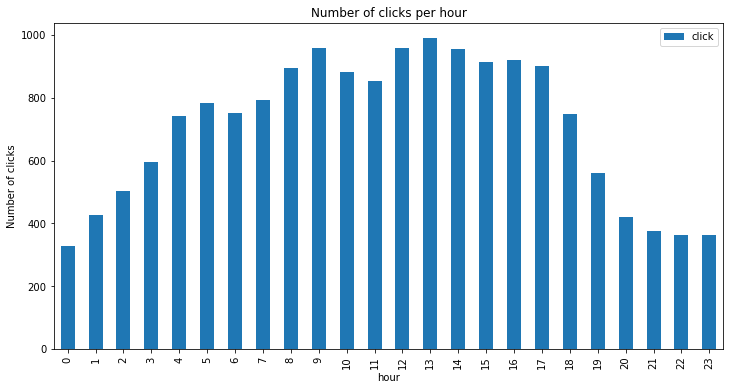

In [11]:
data.groupby('hour').agg({'click':'sum'}).plot(kind='bar',figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks per hour');
plt.show()

#### As seen from the above graph, most of the clicks are made between 8th and 17th hour


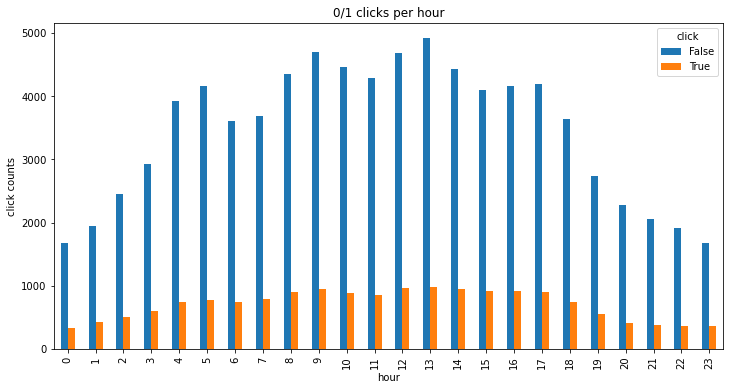

In [12]:
data.groupby(['hour', 'click']).size().unstack().plot(kind='bar', title="Click rate per hour", figsize=(12,6))
plt.ylabel('click counts')
plt.title('0/1 clicks per hour');

#### As seen from above graph, most of the clicks are also made between 8th and 17th hour.

## Plotting no. of clicks per day

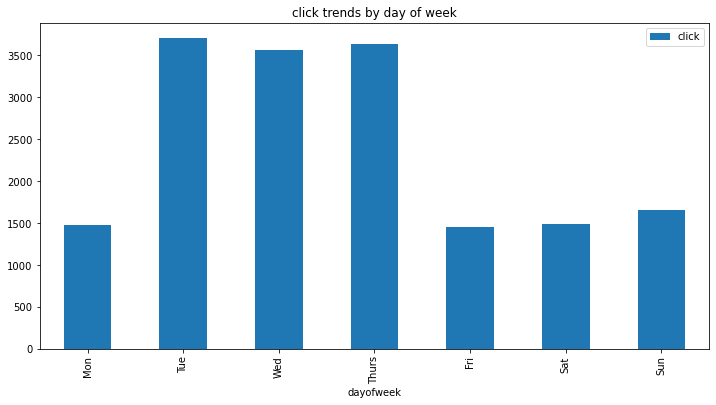

In [14]:
data.groupby('dayofweek').agg({'click':'sum'}).plot(kind='bar',figsize=(12,6))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tue Wed Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week');

#### As seen from above graph, highest no. of clicks are made between tuesday and thursday. Aslo it is low on the other days

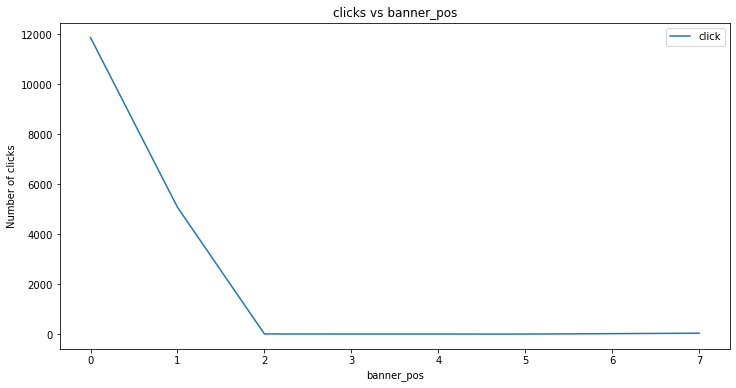

In [15]:
data.groupby('banner_pos').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('clicks vs banner_pos');
plt.show()

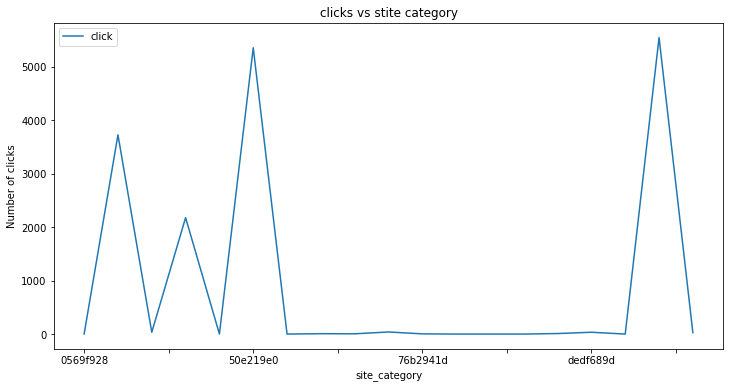

In [16]:
data.groupby('site_category').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('clicks vs stite category');
plt.show()

## Calculating click rate

In [21]:
df_chart = data.groupby(by=["dayofweek","hour"])[["click"]].agg(['sum','count']).reset_index()
df_chart.columns = ["dayofweek","hour","click_sum","clickcount"]
df_chart['clickrate']=df_chart.click_sum/df_chart.clickcount
df_chart

,dayofweek,hour,click_sum,clickcount,clickrate
0,0,0,19,140,0.135714
1,0,1,43,195,0.220513
2,0,2,41,203,0.201970
3,0,3,41,277,0.148014
4,0,4,68,335,0.202985
...,...,...,...,...,...
163,6,19,44,274,0.160584
164,6,20,32,247,0.129555
165,6,21,32,204,0.156863
166,6,22,25,190,0.131579


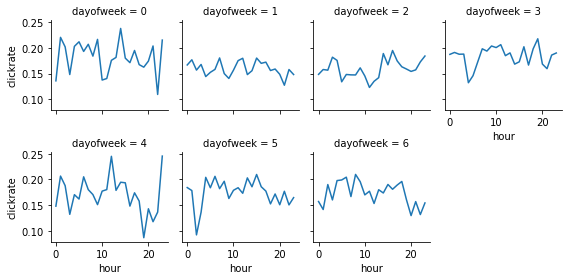

In [22]:
res1 = sns.FacetGrid(df_chart, col="dayofweek", col_wrap=4, height=2)
res1.map(sns.lineplot, "hour", "clickrate")
plt.show()

## Handling categorical variables

In [23]:
#selecting all categorical cols from the dataset
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

#apply hashing for categorical columns
for col in categorical_cols:
    data[col] = data[col].apply(lambda x: hash(x))

print(data.head())

   click    C1  banner_pos              site_id          site_domain  \
0  False  1005           1  -817545578589359479   773172067848547672   
1   True  1005           1 -8200911157569994662 -8844220940339933089   
2  False  1005           0 -3408378212907529138 -1171642672961486559   
3  False  1002           0  7783543452205034798 -4147483058279238443   
4   True  1005           0  2277624723836551745  -332831058092640355   

         site_category               app_id           app_domain  \
0 -7096572789101272163 -8399522610676189679 -1400424385826980510   
1 -7096572789101272163 -8399522610676189679 -1400424385826980510   
2  4851007546268258857 -8399522610676189679 -1400424385826980510   
3 -7590001182921242819 -8399522610676189679 -1400424385826980510   
4  4851007546268258857 -8399522610676189679 -1400424385826980510   

          app_category            device_id  ...   C17  C18  C19     C20  C21  \
0  1361525152210883724  3737782370021826613  ...  2528    0   39  100075  221

In [24]:
#scaling numerical variables
num_cols = data.select_dtypes(include = ['int','float']).columns.tolist()
num_cols.remove('y')
std = StandardScaler()
data[num_cols] = std.fit_transform(data[num_cols])

In [25]:
data.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,0.029719,1.404096,-0.423092,0.140582,-0.547865,-0.58904,0.101062,-0.208055,0.249345,...,0.680510,-1.085232,-0.535564,0.936557,1.964581,0.0,-0.924458,0.846973,0.454532,0
1,True,0.029719,1.404096,-2.133233,-2.169063,-0.547865,-0.58904,0.101062,-0.208055,0.249345,...,-0.297322,0.422135,-0.535564,-1.066882,-0.957281,0.0,-0.344073,-1.174246,1.296468,1
2,False,0.029719,-0.573345,-1.023183,-0.326471,1.554787,-0.58904,0.101062,-0.208055,0.249345,...,0.720018,1.175818,-0.171380,0.939100,-0.857510,0.0,0.236312,-0.837376,1.128081,0
3,False,-2.717759,-0.573345,1.569100,-1.041128,-0.634704,-0.58904,0.101062,-0.208055,-3.387683,...,0.598201,1.175818,-0.171380,0.936537,-0.857510,0.0,-0.344073,-1.174246,1.296468,0
4,True,0.029719,-0.573345,0.293815,-0.125028,1.554787,-0.58904,0.101062,-0.208055,0.249345,...,-0.646312,-1.085232,-0.546945,-1.066882,-0.059343,0.0,-0.924458,-1.511116,-0.555791,1


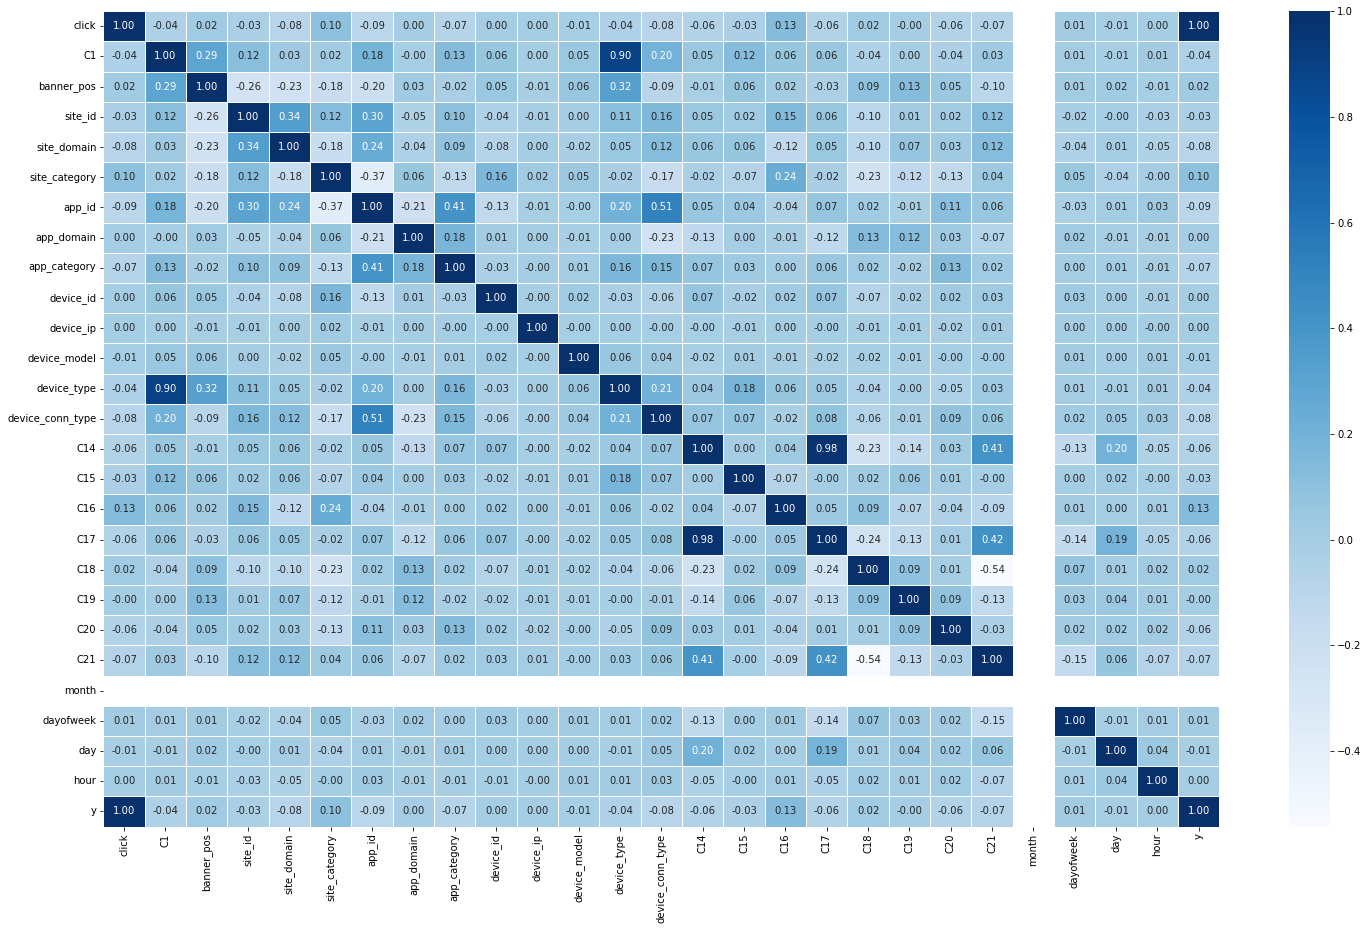

In [28]:
#creating a correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=[25,15])
sns.heatmap(correlation_matrix,annot=True,cmap='Blues',fmt=".2f",linewidth=.5)
plt.show()

#### From the above correlation heat map, we can draw the below conclusions:
    1. Month is not correlated to the target variable Y, hence not helping the prediction process
    2. click and y are highly correlated, we can drop click column from the data
    3. device type is highly correlated (0.90) with C1, to avoid multi-collinearity, we can delete one of these    columns

### Dropping unneccesary cols

In [27]:
train_data = data.drop(columns=['month','C1','click','C17'])
train_data.head()

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,...,C15,C16,C18,C19,C20,C21,dayofweek,day,hour,y
0,1.404096,-0.423092,0.140582,-0.547865,-0.58904,0.101062,-0.208055,0.249345,-1.083432,1.348762,...,0.05418,-0.215428,-1.085232,-0.535564,0.936557,1.964581,-0.924458,0.846973,0.454532,0
1,1.404096,-2.133233,-2.169063,-0.547865,-0.58904,0.101062,-0.208055,0.249345,-1.027682,-0.304568,...,0.05418,-0.215428,0.422135,-0.535564,-1.066882,-0.957281,-0.344073,-1.174246,1.296468,1
2,-0.573345,-1.023183,-0.326471,1.554787,-0.58904,0.101062,-0.208055,0.249345,-1.347369,1.291750,...,0.05418,-0.215428,1.175818,-0.171380,0.939100,-0.857510,0.236312,-0.837376,1.128081,0
3,-0.573345,1.569100,-1.041128,-0.634704,-0.58904,0.101062,-0.208055,-3.387683,1.377933,1.231286,...,0.05418,-0.215428,1.175818,-0.171380,0.936537,-0.857510,-0.344073,-1.174246,1.296468,0
4,-0.573345,0.293815,-0.125028,1.554787,-0.58904,0.101062,-0.208055,0.249345,-0.804598,-0.490117,...,0.05418,-0.215428,-1.085232,-0.546945,-1.066882,-0.059343,-0.924458,-1.511116,-0.555791,1


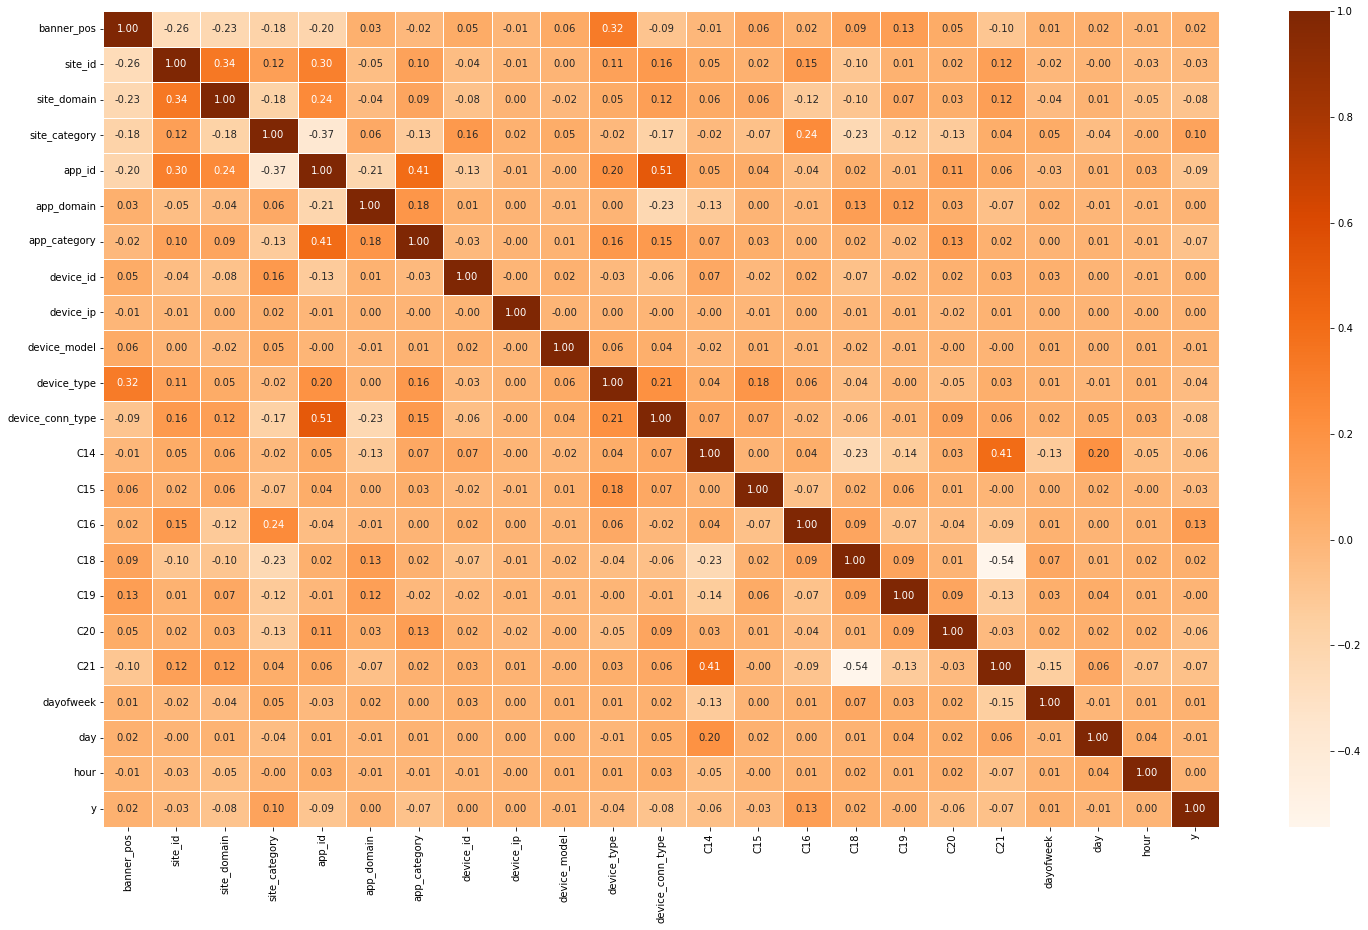

In [29]:
train_correlation_matrix = train_data.corr()
plt.figure(figsize=[25,15])
sns.heatmap(train_correlation_matrix,annot=True,cmap='Oranges',fmt=".2f",linewidth=.5)
plt.show()

## Starting Model Building

As per the problem statement, we need to predict whether or not a person clicks on an add. Since, this is a classification problem, I will be using the below models for the predictions -  
1. Logistic Regression
2. Decision Trees
3. Random forests

In [30]:
#Splitting data into train and test datasets
X = train_data.drop('y', axis=1)
y = train_data.loc[:,['y']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)


In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
y_test.head()

(69999, 22)
(69999, 1)
(30000, 22)
(30000, 1)


,y
26002,0
80420,0
19864,0
81525,1
57878,0


In [32]:
#Creating dummy classifier and printing confusion matrix

0.8296
[[24888     0]
 [ 5112     0]]


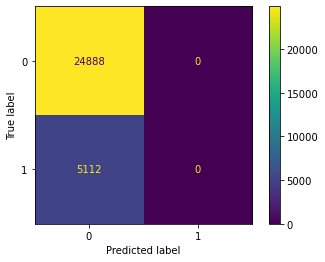

In [33]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

baseline_accuracy_score = metrics.accuracy_score(y_test, y_pred)
print(baseline_accuracy_score)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(dummy_clf, X_test, y_test)
plt.show()

0.5


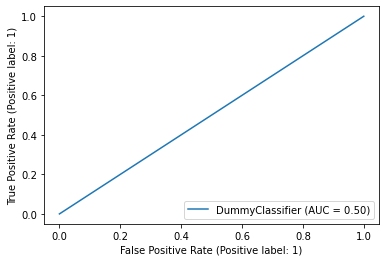

In [34]:
baseline_roc_auc_score = metrics.roc_auc_score(y_test, dummy_clf.predict_proba(X_test)[:, 1])
print(baseline_roc_auc_score)
metrics.plot_roc_curve(dummy_clf, X_test, y_test) 
plt.show()

## 1. Logistic Regression Model

In [35]:
# making a logistic regression object
logistic_model = LogisticRegression()

# train the model on the data
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [36]:
logistic_model.coef_

array([[ 0.07910151, -0.04424808, -0.07064434,  0.14102501, -0.0095489 ,
        -0.02938011, -0.13448831, -0.03091843,  0.00482216, -0.02435113,
        -0.12284382, -0.16780869, -0.10089487, -0.01988551,  0.2265883 ,
        -0.04312283,  0.02137935, -0.10562069, -0.12849086, -0.00978854,
         0.00373108, -0.00911429]])

In [37]:
logistic_model.coef_.shape

(1, 22)

0.8292333333333334
[[24867    21]
 [ 5102    10]]


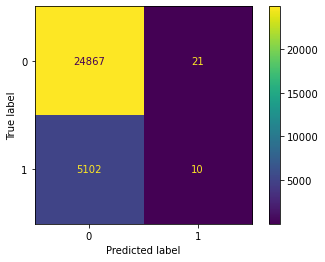

In [38]:
# Use the testing data to make predictions and determine the accuracy of the predictions.
y_pred = logistic_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(logistic_model, X_test, y_test)
plt.show()

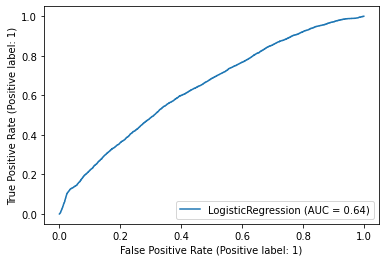

In [39]:
metrics.roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
metrics.plot_roc_curve(logistic_model, X_test, y_test) 
plt.show()

### Logistic regression with feature selection using RFE with 17 features

In [40]:
logistic_model_rfe = LogisticRegression()

rfe = RFE(logistic_model_rfe, n_features_to_select=17)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('banner_pos', True, 1),
 ('site_id', True, 1),
 ('site_domain', True, 1),
 ('site_category', True, 1),
 ('app_id', False, 2),
 ('app_domain', True, 1),
 ('app_category', True, 1),
 ('device_id', True, 1),
 ('device_ip', False, 5),
 ('device_model', True, 1),
 ('device_type', True, 1),
 ('device_conn_type', True, 1),
 ('C14', True, 1),
 ('C15', True, 1),
 ('C16', True, 1),
 ('C18', True, 1),
 ('C19', True, 1),
 ('C20', True, 1),
 ('C21', True, 1),
 ('dayofweek', False, 3),
 ('day', False, 6),
 ('hour', False, 4)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['banner_pos', 'site_id', 'site_domain', 'site_category', 'app_domain',
       'app_category', 'device_id', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['app_id', 'device_ip', 'dayofweek', 'day', 'hour'], dtype='object')

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
logistic_model_rfe.fit(X_train_rfe,y_train)
logistic_model_rfe.coef_.shape

(1, 17)

Accuracy 0.8292
[[24866    22]
 [ 5102    10]]


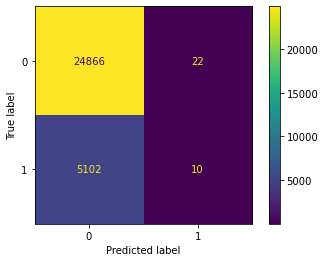

In [62]:
X_test_rfe = X_test[col]

# Use the testing data to make predictions and determine the accuracy of your predictions.
y_pred = logistic_model_rfe.predict(X_test_rfe)

print("Accuracy",metrics.accuracy_score(y_test, y_pred))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(logistic_model_rfe, X_test_rfe, y_test)
plt.show()

0.6400211877222475


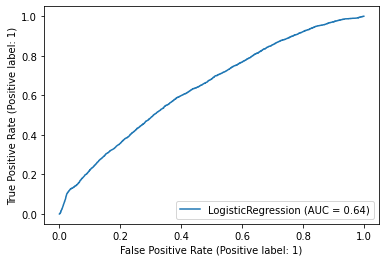

In [47]:
print(metrics.roc_auc_score(y_test, logistic_model_rfe.predict_proba(X_test_rfe)[:, 1]))
metrics.plot_roc_curve(logistic_model_rfe, X_test_rfe, y_test) 
plt.show()

##### with 22 features and 17 features, the accuracy is same, if we drop below these features, the accuracy and AUC are dropping below the baseline model

## 2. Decision Tree Classifier

accuracy value: 0.7373333333333333
[[20733  4155]
 [ 3725  1387]]


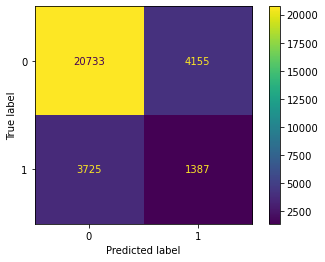

In [48]:
dt_basic = DecisionTreeClassifier()
#Fit the training data in the classifier as follows: 
dt_basic.fit(X_train,y_train)
#Make predictions based on the test data using the code below:
y_preds = dt_basic.predict(X_test)
#You can calculate the accuracy for this code as follows:
accuracy_value = metrics.accuracy_score(y_test, y_preds)
print('accuracy value: {accuracy}'.format( accuracy = accuracy_value))

#print the confusion matrix:
print(metrics.confusion_matrix(y_test, y_preds))
metrics.plot_confusion_matrix(dt_basic,X_test, y_test)
plt.show()

In [49]:
print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     24888
           1       0.25      0.27      0.26      5112

    accuracy                           0.74     30000
   macro avg       0.55      0.55      0.55     30000
weighted avg       0.75      0.74      0.74     30000



0.5521535461653811


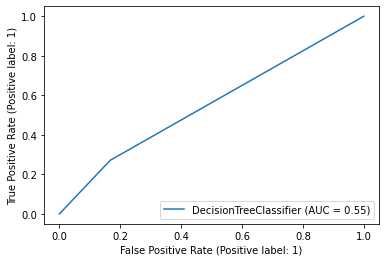

In [50]:
print(metrics.roc_auc_score(y_test, dt_basic.predict_proba(X_test)[:, 1]))
metrics.plot_roc_curve(dt_basic, X_test, y_test) 
plt.show()

In [51]:
#Decision tree with hyperparameters tunned

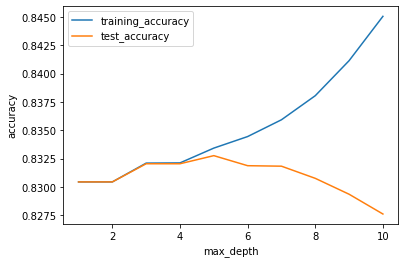

In [52]:
parameters = {
    'max_depth': range(1,11)
}

classifier = DecisionTreeClassifier(criterion='gini',random_state=42)
n_folds = 5

#Use GridSearchCV to implement max_depth as follows:
tree=GridSearchCV(classifier,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)



#Fit the training data in the Decision Tree as follows:
tree.fit(X_train, y_train)

scores = tree.cv_results_


#Plot the training and testing data accuracy as follows:
plt.figure
plt.plot(scores["param_max_depth"].data,scores["mean_train_score"],label="training_accuracy")
plt.plot(scores["param_max_depth"].data, scores["mean_test_score"], label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

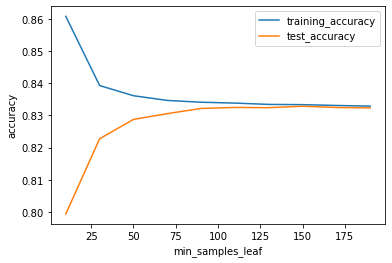

In [53]:
parameters = {
    'min_samples_leaf': range(10,200,20)
}

classifier = DecisionTreeClassifier(criterion='gini',random_state=42)
n_folds = 5

#Use GridSearchCV to implement max_depth as follows:
tree=GridSearchCV(classifier,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)



#Fit the training data in the Decision Tree as follows:
tree.fit(X_train, y_train)

scores = tree.cv_results_

# print(scores)


#Plot the training and testing data accuracy as follows:
plt.figure
plt.plot(scores["param_min_samples_leaf"].data,scores["mean_train_score"],label="training_accuracy")
plt.plot(scores["param_min_samples_leaf"].data, scores["mean_test_score"], label="test_accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.legend()
plt.show()

#### As seen from the above calculations, taking hyperparameters as follows - 
1. min_depth = 4
2. min_samples_leaf = 175

Precision: 0.7416120395088093, Recall: 0.8292, Accuracy: 0.8318333333333333
[[24608   280]
 [ 4765   347]]


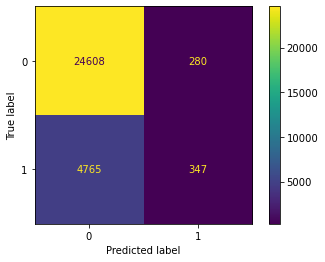

In [54]:
classifier = DecisionTreeClassifier(criterion='gini',random_state=42, min_samples_leaf=175, max_depth=4)

#train the model
classifier.fit(X_train,y_train)

#Make predictions based on the test data using the code below:
y_preds = classifier.predict(X_test)
prec = metrics.precision_score(y_test, y_pred, average = 'weighted')
recall = metrics.recall_score(y_test, y_pred, average = 'weighted')
accuracy_value = metrics.accuracy_score(y_test, y_preds)
print("Precision: {precision}, Recall: {rec}, Accuracy: {accuracy}".format(precision = prec, rec = recall, accuracy = accuracy_value))

#print the confusion matrix:
print(metrics.confusion_matrix(y_test, y_preds))
metrics.plot_confusion_matrix(classifier,X_test, y_test)
plt.show()


0.6487082630969213


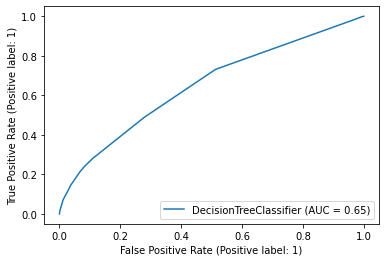

In [55]:
print(metrics.roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1]))
metrics.plot_roc_curve(classifier, X_test, y_test) 
plt.show()

#### After tunning hyperparameters, the accuracy has been increased 

## 3. Random Forests

In [56]:
model_rf = RandomForestClassifier(n_estimators=10, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)
print('Classification Report:\n')
print(classification_report(y_test, predict_rf))

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     24888
           1       0.38      0.12      0.18      5112

    accuracy                           0.82     30000
   macro avg       0.61      0.54      0.54     30000
weighted avg       0.76      0.82      0.78     30000



In [57]:
def print_recall_scores(ensemble, feats, true_labels):
    '''
    Prints the recall scores for base estimators in a sklearn ensemble model.
    '''
    scores = []
    for model_idx, model in enumerate(ensemble.estimators_):
        if model_idx == 0:
            print('='*40)
        preds = model.predict(feats)
        scores.append(recall_score(true_labels, preds))
        model_recall = np.round(recall_score(true_labels, preds), 5)
        print(f'Recall for Base Model {model_idx+1}:\t', model_recall)
        if model_idx < (len(ensemble.estimators_) - 1):
            print('-'*40)
        else:
            print('='*40)
    ensemble_preds = ensemble.predict(feats)
    print("Mean Recall Score:\t\t", np.round(np.array(scores).mean(), 5))
    print("Std Deviation:\t\t\t", np.round(np.array(scores).std(), 5))
    print("Range:\t\t\t\t", np.round(np.array(scores).ptp(), 5))
    print(f'Overall Recall for model:\t {np.round(recall_score(y_test, ensemble_preds), 5)}')
    
print_recall_scores(model_rf, X_test, y_test)

Recall for Base Model 1:	 0.26545
----------------------------------------
Recall for Base Model 2:	 0.27074
----------------------------------------
Recall for Base Model 3:	 0.27973
----------------------------------------
Recall for Base Model 4:	 0.25411
----------------------------------------
Recall for Base Model 5:	 0.27602
----------------------------------------
Recall for Base Model 6:	 0.26702
----------------------------------------
Recall for Base Model 7:	 0.26702
----------------------------------------
Recall for Base Model 8:	 0.27602
----------------------------------------
Recall for Base Model 9:	 0.28228
----------------------------------------
Recall for Base Model 10:	 0.26369
Mean Recall Score:		 0.27021
Std Deviation:			 0.00805
Range:				 0.02817
Overall Recall for model:	 0.12011


In [58]:
model_rf_oob = RandomForestClassifier(n_estimators=100, max_features=7, oob_score=True, random_state=42).fit(X_train, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('OOB Score:\t\t\t', oob_score)
print('Testing Accuracy:\t\t', acc_oob)
print('Acc. Difference:\t\t', diff_oob)

OOB Score:			 0.821
Testing Accuracy:		 0.822
Acc. Difference:		 0.001


In [59]:
predict_rf_oob = model_rf_oob.predict(X_test)
recall_rf_oob = recall_score(y_test, predict_rf_oob)
precision_rf = precision_score(y_test, predict_rf_oob)
print('Classification Report:\n')
print(classification_report(y_test, predict_rf_oob))

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     24888
           1       0.42      0.12      0.18      5112

    accuracy                           0.82     30000
   macro avg       0.63      0.54      0.54     30000
weighted avg       0.77      0.82      0.78     30000



0.6865228524258161


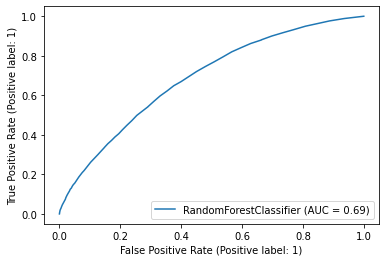

In [60]:
print(roc_auc_score(y_test, model_rf_oob.predict_proba(X_test)[:, 1]))
metrics.plot_roc_curve(model_rf_oob, X_test, y_test) 
plt.show()

OOB Score:			 0.8235
Testing Accuracy:		 0.8247
Acc. Difference:		 0.0012
Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     24888
           1       0.44      0.10      0.17      5112

    accuracy                           0.82     30000
   macro avg       0.64      0.54      0.53     30000
weighted avg       0.77      0.82      0.78     30000

0.6865279299461902


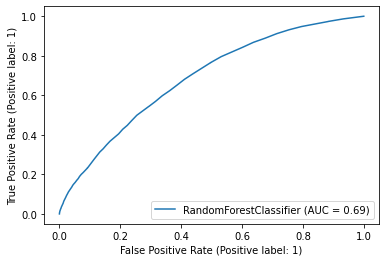

In [61]:
model_rf_balanced = RandomForestClassifier(n_estimators=100, max_features=7, oob_score=True, random_state=42,class_weight='balanced').fit(X_train, y_train)
oob_score = round(model_rf_balanced.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_balanced.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('OOB Score:\t\t\t', oob_score)
print('Testing Accuracy:\t\t', acc_oob)
print('Acc. Difference:\t\t', diff_oob)


predict_rf_balanced = model_rf_balanced.predict(X_test)
recall_rf_balanced = recall_score(y_test, predict_rf_balanced)
precision_rf_balanced = precision_score(y_test, predict_rf_balanced)
print('Classification Report:\n')
print(classification_report(y_test, predict_rf_balanced))


print(roc_auc_score(y_test, model_rf_balanced.predict_proba(X_test)[:, 1]))
metrics.plot_roc_curve(model_rf_balanced, X_test, y_test) 
plt.show()

### From all the three models used above the final accuracy comes out to be as follows - 
1. Logistic regression with RFE = 0.8292
2. Decision Tree Classifier with hyperparameter tunning = 0.8303
3. Random Forests = 0.82

As we can see from the results Decision tree classification gives a better accuracy than the other two models with an accuracy of 83%.